EXPLORATORY DATA ANALYSIS

- Importing dataset

In [1]:
#importing libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import dataset
df = pd.read_csv(r"C:\Users\user\OneDrive\Máy tính\Personal Project\Brishtish Airway\British_Airway.csv")

- Understanding the big picture

Columns description

There are 16 columns and 3000 observations
 - ReviewId: Dtype - Numeric; Context: ID of customer's review; Expectation - Low
 - Rating10: Dtpe - Numeric (int); Context: Overall score that customer rates about the flight (from 1 to 10); Expectation - High
 - Review: Dtype - String; Context: Feedback of customer for the flight; Expectation - Low
 - Aircraft: Dtype - Categorical (Norminal); Context: Name of aircraft; Expectation - Medium
 - Travel_Type: Dtype - Categorical (Norminal); Context: Type of travel; Expectation - Medium
 - Travel_Class: Dtype - Categorical (Norminal); Context: Type of class; Expectation - Medium
 - Route: Dtype - String; Context: From where to wher; Expectation - Medium
 - Date_flown: Dtype - Datetime; Context: Date of flight; Expectation - Medium
 - Seat_comfort: Dtype - Categorical (Ordinal); Context: Rate score about customer's seat (from 1 to 5); Expectation - Medium
 - Cabin_staff_service: Dtype - Categorical (Ordinal); Context: Rate score about cabin staff service (from 1 to 5); Expectation - Medium
 - Food_beverages: Dtype - Categorical (Ordinal); Context: Rate score about food and beverages (from 1 to 5); Expectation - Medium
 - Inflight_entertainment: Dtype - Categorical (Ordinal); Context: Rate score about entertainment (from 1 to 5); Expectation - Medium
 - Wifi_connectivity: Dtype - Categorical (Ordinal); Context: Rate score about connectivity of wifi (from 1 to 5); Expectation - Medium
 - Ground_service: Dtype - Categorical (Ordinal); Context: Rate score about service of ground (from 1 to 5); Expectation - Medium
 - Value_for_money: Dtype - Categorical (Ordinal); Context: Rate score about value for money (from 1 to 5); Expectation - Medium
 - Recommend: Dtype - Categorical (Binary); Context: Should the customer recommend BA for friend and family (Yes/No); Expectation - High


In [3]:
df.head(n=3)

,ReviewId,Rating10,Review,Aircraft,Travel_Type,Travel_Class,Route,Date_flown,Seat_comfort,Cabin_staff_service,Food_beverages,Inflight_entertainment,Wifi_connectivity,Ground_service,Value_for_money,Recommend
0,862044,4,✅ Trip Verified | My family and I have flown ...,Boeing 777,Couple Leisure,Premium Economy,Chennai to London,July 2023,3.0,2.0,1.0,1.0,NaN,4.0,1,no
1,862019,2,✅ Trip Verified | This has been by far the wo...,A321neo,Couple Leisure,Economy Class,Istanbul to London,July 2023,2.0,2.0,NaN,NaN,NaN,1.0,1,no
2,861892,2,✅ Trip Verified | In Nov 2022 I booked and pa...,NaN,Solo Leisure,Economy Class,London to Edinburgh,November 2022,2.0,5.0,3.0,3.0,NaN,1.0,2,no


In [4]:
df.shape

(3000, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ReviewId                3000 non-null   int64  
 1   Rating10                3000 non-null   int64  
 2   Review                  3000 non-null   object 
 3   Aircraft                1866 non-null   object 
 4   Travel_Type             2828 non-null   object 
 5   Travel_Class            2998 non-null   object 
 6   Route                   2823 non-null   object 
 7   Date_flown              2820 non-null   object 
 8   Seat_comfort            2894 non-null   float64
 9   Cabin_staff_service     2884 non-null   float64
 10  Food_beverages          2641 non-null   float64
 11  Inflight_entertainment  1916 non-null   float64
 12  Wifi_connectivity       573 non-null    float64
 13  Ground_service          2757 non-null   float64
 14  Value_for_money         3000 non-null   

In [6]:
df.describe()

,ReviewId,Rating10,Seat_comfort,Cabin_staff_service,Food_beverages,Inflight_entertainment,Wifi_connectivity,Ground_service,Value_for_money
count,3000.000000,3000.000000,2894.000000,2884.000000,2641.000000,1916.000000,573.000000,2757.000000,3000.000000
mean,525611.852000,4.570000,2.822737,3.215673,2.652026,2.657098,1.928447,2.811752,2.603333
std,168360.762197,3.140019,1.359640,1.486189,1.438014,1.390327,1.358775,1.451852,1.452822
min,243905.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,386281.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,491917.500000,4.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,2.000000
75%,665934.750000,8.000000,4.000000,5.000000,4.000000,4.000000,3.000000,4.000000,4.000000
max,862044.000000,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


- Preparation

In [7]:
#remove unnecessary characters in Review column
for i in range(len(df)):
    try:
        df.loc[i, 'Review'] = df.loc[i, 'Review'].split("|")[1]
    except:
        pass

In [8]:
df[['Review']].head()

,Review
0,My family and I have flown mostly on British...
1,This has been by far the worst service I hav...
2,In Nov 2022 I booked and paid for a return j...
3,BA is not treating its premium economy passen...
4,24 hours before our departure on BA059 to Ca...


In [9]:
#check Aircraft column
df['Aircraft'].value_counts(dropna=False)

Aircraft
NaN                      1134
A320                      343
Boeing 777                268
Boeing 747-400            182
A380                      161
                         ... 
Boeing 747-400 / A319       1
A319 / Boeing 787-9         1
Airbus A32                  1
A320 / Boeing 787-9         1
Airbus 319                  1
Name: count, Length: 196, dtype: int64

In [10]:
#remove whitespace in leading and trailing of Aircraft column
for i in range(len(df)):
    try:
        df.loc[i, "Aircraft"] = df.loc[i, "Aircraft"].strip()
    except:
        pass

In [11]:
#checking values in Aircaft column
df['Aircraft'].unique()

array(['Boeing 777', 'A321neo', nan, 'Boeing 777 -200', 'Boeing 777-200',
       'A380', 'A321', 'A320', 'A321Neo', 'A321 neo', 'Embraer 190',
       'A350', 'Boeing 737', 'Boeing 787', 'Boeing 777-300',
       'A320 Finnair', 'A319', 'Boeing 787-9', 'Dreamliner',
       'Boeing 787 / A320', 'Boeing 777 / A320', 'Boeing 777-300ER',
       'Boeing 787-8', 'A320, A380', 'A350-1000', 'Boeing 787-10',
       'A320neo', 'A320-200', 'A320, Boeing 787', 'A321 Neo',
       'Boeing 737 800', 'A320 / Boeing 777', 'Embraer',
       'Boeing 777-200ER', 'Boeing 787-900', 'A321-neo', 'A322',
       'Boeing 737-800', 'A320 Neo', 'A320NEO', 'A330', 'A230', 'A321NEO',
       'Boeing 747', 'Embraer 195', 'Boeing 747-400', 'A380-800',
       'Boeing 777-200 / 747-400', 'Boeing 777 - 200',
       'Boeing 787-9, A320-200', 'EMB190', 'A319 / Boeing777',
       'A340-300, A320', 'A321-200', 'B777-200', 'A320 neo',
       'A319 / Boeing 789', 'Boeing 777-200 and A319',
       'A321 / Boeing 787-9', 'Boeing 77

In [12]:
#fill missing values
df['Aircraft'].fillna("Unknown", inplace=True)

#create list of consistent values
air_craft = [
    'Boeing B737', 'Boeing B747','Boeing B757','Boeing B767','Boeing B777','Boeing B787',
    'Airbus A300','Airbus A318','Airbus A319','Airbus A320', 'Airbus A321','Airbus A322',
    'Airbus A330','Airbus A340','Airbus A350', 'Airbus A380', 'Embraer E170', 'Embraer E190',
    'Embraer E195', 'SAAB 2000'
]

#create filter
boeing_b737 = "Boeing 737|Boeing 737-800|Boeing 737-400|737"
boeing_b747 = "Boeing 747|Boeing 747-400|Boeing 744|Boeing 747-300|B747|747"
boeing_b757 = "Boeing 757"
boeing_b767 = "Boeing 767|Boeing 767-300|767-300"
boeing_b777 = "777|Boeing 777|Boeing 777-200|Boeing 777-300|Boeing 777-236"
boeing_b787 = "Boeing 787|Boeing 787-8|Boeing 787-9|Boeing 787-10|Dreamliner|Boeing 787-800|Boeing 787-900|B787|787"

airbus_a300 = "300"
airbus_a318 = "318|A318"
airbus_a319 = "319|A319|A19|A219|Airbus 319"
airbus_a320 = "A320|320|320neo|320NEO|320 neo|320 NEO|Airbus A320|Airbus A32|A320-200|A320-233"
airbus_a321 = "A321|321|A321neo|A321 neo|A321 Neo|A321Neo|A321-200"
airbus_a322 = "A322|322"
airbus_a330 = "A330|330"
airbus_a340 = "A340|340|A340-400"
airbus_a350 = "A350|350|A350-1000"
airbus_a380 = "A380|380|Airbus A380|A380-800"

embraer_e170 = "Embraer 170|E-170|Embraer170|E170"
embraer_e190 = "Embraer 190|Embraer|EMB190|E190|E-190|Embraer E190"
embraer_e195 = "Embraer 195"

saab = "Saab 2000|SAAB 2000"

#create a list contains filters
conditions = [
    (df['Aircraft'].str.contains(boeing_b737)),
    (df['Aircraft'].str.contains(boeing_b747)),
    (df['Aircraft'].str.contains(boeing_b757)),
    (df['Aircraft'].str.contains(boeing_b767)),
    (df['Aircraft'].str.contains(boeing_b777)),
    (df['Aircraft'].str.contains(boeing_b787)),
    (df['Aircraft'].str.contains(airbus_a300)),
    (df['Aircraft'].str.contains(airbus_a318)),
    (df['Aircraft'].str.contains(airbus_a319)),
    (df['Aircraft'].str.contains(airbus_a320)),
    (df['Aircraft'].str.contains(airbus_a321)),
    (df['Aircraft'].str.contains(airbus_a322)),
    (df['Aircraft'].str.contains(airbus_a330)),
    (df['Aircraft'].str.contains(airbus_a340)),
    (df['Aircraft'].str.contains(airbus_a350)),
    (df['Aircraft'].str.contains(airbus_a380)),
    (df['Aircraft'].str.contains(embraer_e170)),
    (df['Aircraft'].str.contains(embraer_e190)),
    (df['Aircraft'].str.contains(embraer_e195)),
    (df['Aircraft'].str.contains(saab))
]

#collapsing Aircraft column
df['Aircraft'] = np.select(conditions, air_craft, default = 'Orther')

In [13]:
df['Aircraft'].unique()

array(['Boeing B777', 'Airbus A321', 'Orther', 'Airbus A380',
       'Airbus A320', 'Embraer E190', 'Airbus A350', 'Boeing B737',
       'Boeing B787', 'Airbus A319', 'Airbus A322', 'Airbus A330',
       'Boeing B747', 'Airbus A300', 'Boeing B767', 'Airbus A318',
       'Boeing B757', 'Embraer E170', 'SAAB 2000'], dtype=object)

In [14]:
df['Aircraft'].value_counts()

Aircraft
Orther          1136
Boeing B777      506
Airbus A320      371
Boeing B747      321
Airbus A380      172
Boeing B787      148
Airbus A319      128
Airbus A321      100
Boeing B767       55
Airbus A350       17
Boeing B737       15
Embraer E190      13
Embraer E170       6
Airbus A318        5
Airbus A300        2
SAAB 2000          2
Airbus A322        1
Airbus A330        1
Boeing B757        1
Name: count, dtype: int64

In [15]:
#replace 'Orther' values
df['Aircraft'].replace(to_replace='Orther', value='Boeing B777', inplace=True)

In [16]:
df['Travel_Type'].unique()

array(['Couple Leisure', 'Solo Leisure', 'Family Leisure', 'Business',
       nan], dtype=object)

In [17]:
df['Travel_Type'].value_counts(dropna=False)

Travel_Type
Couple Leisure    955
Solo Leisure      864
Business          624
Family Leisure    385
NaN               172
Name: count, dtype: int64

In [18]:
#the most popular value in Travel_Type column
from statistics import mode
mode = mode(df['Travel_Type'])
mode

'Couple Leisure'

In [19]:
#fill missing value using mode
df['Travel_Type'].fillna(mode, inplace=True)

In [20]:
df['Travel_Class'].unique()

array(['Premium Economy', 'Economy Class', 'Business Class',
       'First Class', nan], dtype=object)

In [21]:
df['Travel_Class'].value_counts(dropna=False)

Travel_Class
Economy Class      1601
Business Class      932
Premium Economy     296
First Class         169
NaN                   2
Name: count, dtype: int64

In [22]:
from statistics import mode
mode1 = mode(df['Travel_Class'])
mode1

'Economy Class'

In [23]:
df['Travel_Class'].fillna(mode1, inplace=True)

In [24]:
df['Route'].unique()

array(['Chennai to London ', 'Istanbul to London', 'London to Edinburgh',
       ..., 'London-Vancouver return', 'LHR-ORD', 'BOM-LHR'], dtype=object)

In [25]:
df['Route'].value_counts(dropna=False)

Route
NaN                              177
London to Johannesburg            16
London to Cape Town               15
Johannesburg to London            13
Vancouver to London               13
                                ... 
London to Tehran                   1
London Heathrow to Manchester      1
Edinburgh-Florence                 1
Aberdeen to Boston via London      1
BOM-LHR                            1
Name: count, Length: 1546, dtype: int64

In [26]:
for i in range(len(df)):
    try:
        df.loc[i, "Route"] = df.loc[i, "Route"].replace("-", " to ") 
        df.loc[i, "Route"] = df.loc[i, "Route"].split("via")[0]
    except:
        pass

In [27]:
df.dropna(subset=['Route'], inplace=True)

In [28]:
for i in range(len(df)):
    try:
        df.loc[i, "Date_flown"] = df.loc[i, "Date_flown"].replace(" ", "-")
    except:
        pass

In [29]:
#convert dtype
df["Date_flown"] = pd.to_datetime(df['Date_flown'])

C:\Users\user\AppData\Local\Temp\ipykernel_7252\3657373704.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date_flown"] = pd.to_datetime(df['Date_flown'])


In [30]:
df['Date_flown'] = df['Date_flown'].dt.strftime("%Y-%m")

In [31]:
df.dropna(subset=['Date_flown'] ,inplace=True)

In [32]:
df['Date_flown'].value_counts(dropna=False)

Date_flown
2015-08    83
2015-09    77
2015-11    66
2017-04    65
2015-10    64
           ..
2014-10     1
2020-06     1
2014-08     1
2015-02     1
2014-07     1
Name: count, Length: 108, dtype: int64

In [33]:
df.isna().sum()

ReviewId                     0
Rating10                     0
Review                       0
Aircraft                     0
Travel_Type                  0
Travel_Class                 0
Route                        0
Date_flown                   0
Seat_comfort               104
Cabin_staff_service        114
Food_beverages             356
Inflight_entertainment    1081
Wifi_connectivity         2245
Ground_service              62
Value_for_money              0
Recommend                    0
dtype: int64

In [34]:
df['Seat_comfort'].mode()[0]

1.0

In [35]:
#imputing missing values
#cols with missing values
cols_with_missing_vals = df.columns[df.isna().sum()>0]

#fill missing values with mode value
for col in cols_with_missing_vals:
    df[col].fillna(df[col].mode()[0], inplace=True)


In [36]:
df.isna().sum()

ReviewId                  0
Rating10                  0
Review                    0
Aircraft                  0
Travel_Type               0
Travel_Class              0
Route                     0
Date_flown                0
Seat_comfort              0
Cabin_staff_service       0
Food_beverages            0
Inflight_entertainment    0
Wifi_connectivity         0
Ground_service            0
Value_for_money           0
Recommend                 0
dtype: int64

In [37]:
#checking duplicated rows
df.duplicated().sum()

0

- Analysis "Review" column

In [38]:
#creating stop-words dictionary
import nltk
from nltk.corpus import stopwords

englishStopWords = set(nltk.corpus.stopwords.words('english'))
nonEnglishStopWords = set(nltk.corpus.stopwords.words()) - englishStopWords
stopWordsDict = {lang: set(nltk.corpus.stopwords.words(lang)) for lang in nltk.corpus.stopwords.fileids()}

In [39]:
#func to determine most language in "Review" column
def get_language(text):
    if type(text) is str:
        text = text.lower()
    words = set(nltk.wordpunct_tokenize(text))
    return max(((lang, len(words & stopwords)) for lang, stopwords in stopWordsDict.items()), key=lambda x: x[1])[0]

In [40]:
#language column in df
df['Language'] = df['Review'].apply(get_language)
language_count = df['Language'].value_counts(dropna=False)
language_count

Language
hinglish    2798
english       17
Name: count, dtype: int64

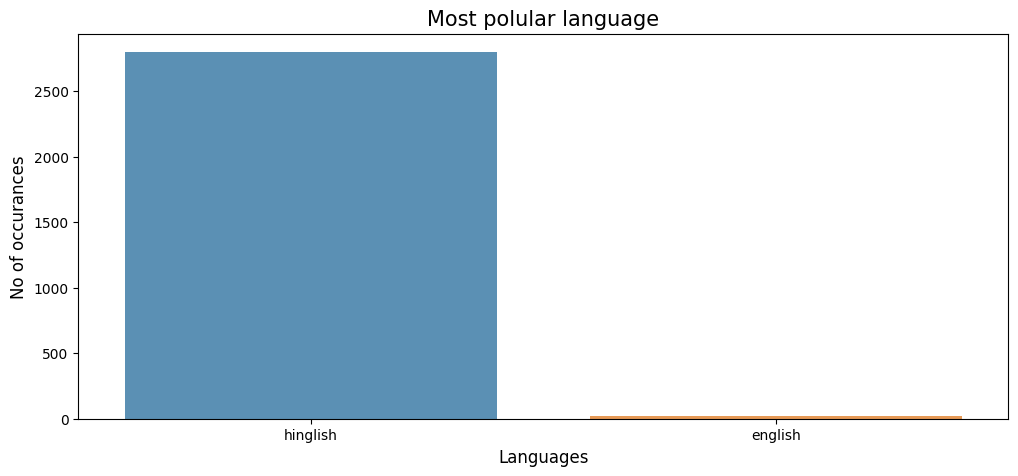

In [41]:
plt.figure(figsize=(12,5))
sns.barplot(x=language_count.index, y=language_count.values, alpha=0.8)
plt.title('Most polular language', fontsize=15)
plt.xlabel('Languages', fontsize=12)
plt.ylabel("No of occurances", fontsize=12)
plt.show()

- Creating Wordcloud

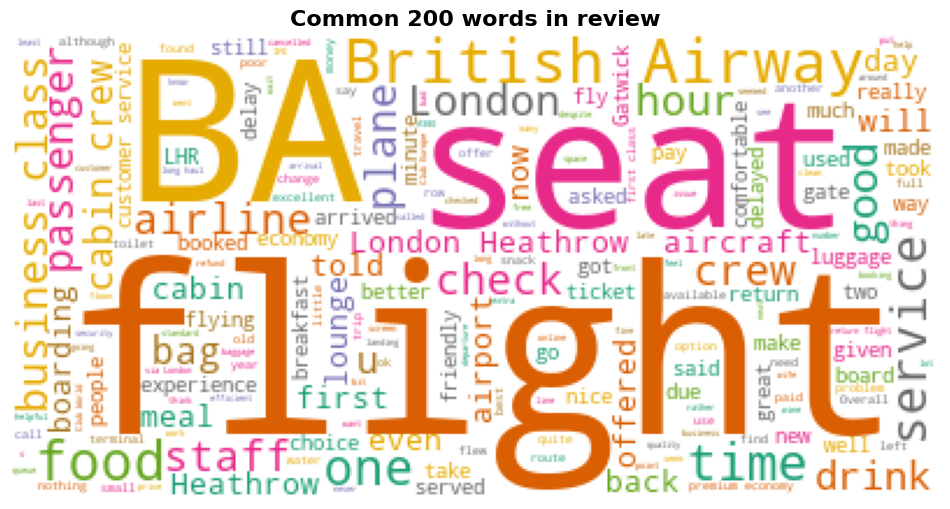

In [42]:
#create wordcloud
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      max_words=200,
                      contour_width=3,
                      contour_color = 'dodgerblue',
                      colormap='Dark2',
                      ).generate(" ".join(df['Review']))

plt.figure(figsize=(12,7))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Common 200 words in review", fontsize=16, weight='bold')
plt.show()

- Sentiment Analysis

In [43]:
from transformers import pipeline
from tqdm.notebook import tqdm

#sentiment analysis using pipeline from Transformers library
model_path = f"siebert/sentiment-roberta-large-english"
sent_pipline = pipeline("sentiment-analysis", model=model_path,
                        tokenizer = "siebert/sentiment-roberta-large-english",
                        max_length = 512, truncation=True)

res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
        text = row['Review']
        myid = row['ReviewId']
        roberta = sent_pipline(text)
        roberta_dict = {'sentiment': roberta[0]['label'], 'score': roberta[0]['score']}
        res[myid] = roberta_dict

WARNING[XFORMERS]: xFormers can't load C++/CUDA extensions. xFormers was built for:
    PyTorch 2.0.1+cu118 with CUDA 1108 (you have 2.0.1+cpu)
    Python  3.11.3 (you have 3.11.2)
  Please reinstall xformers (see https://github.com/facebookresearch/xformers#installing-xformers)
  Memory-efficient attention, SwiGLU, sparse and more won't be available.
  Set XFORMERS_MORE_DETAILS=1 for more details


  0%|          | 0/2815 [00:00<?, ?it/s]

In [44]:
#create sentiment df
sentiment = pd.DataFrame(res).T
sentiment = sentiment.reset_index().rename(columns = {'index': 'ReviewId'})
sentiment.head(n=10)

,ReviewId,sentiment,score
0,862044,NEGATIVE,0.999509
1,862019,NEGATIVE,0.999512
2,861892,NEGATIVE,0.999395
3,861589,NEGATIVE,0.999503
4,861382,NEGATIVE,0.999491
5,861357,NEGATIVE,0.999509
6,861255,NEGATIVE,0.999501
7,861048,NEGATIVE,0.999499
8,860817,POSITIVE,0.998878
9,860334,NEGATIVE,0.999497


In [45]:
#create new df
df = df.merge(sentiment, how='inner', on='ReviewId')
df.head(n=10)

,ReviewId,Rating10,Review,Aircraft,Travel_Type,Travel_Class,Route,Date_flown,Seat_comfort,Cabin_staff_service,Food_beverages,Inflight_entertainment,Wifi_connectivity,Ground_service,Value_for_money,Recommend,Language,sentiment,score
0,862044,4,My family and I have flown mostly on British...,Boeing B777,Couple Leisure,Premium Economy,Chennai to London,2023-07,3.0,2.0,1.0,1.0,1.0,4.0,1,no,hinglish,NEGATIVE,0.999509
1,862019,2,This has been by far the worst service I hav...,Airbus A321,Couple Leisure,Economy Class,Istanbul to London,2023-07,2.0,2.0,1.0,1.0,1.0,1.0,1,no,hinglish,NEGATIVE,0.999512
2,861892,2,In Nov 2022 I booked and paid for a return j...,Boeing B777,Solo Leisure,Economy Class,London to Edinburgh,2022-11,2.0,5.0,3.0,3.0,1.0,1.0,2,no,hinglish,NEGATIVE,0.999395
3,861589,4,BA is not treating its premium economy passen...,Boeing B777,Family Leisure,Premium Economy,Kingston to London,2023-06,5.0,4.0,4.0,3.0,1.0,3.0,3,no,hinglish,NEGATIVE,0.999503
4,861382,1,24 hours before our departure on BA059 to Ca...,Boeing B777,Couple Leisure,Economy Class,London Heathrow to Cape Town,2023-06,1.0,3.0,1.0,3.0,1.0,3.0,2,no,hinglish,NEGATIVE,0.999491
5,861357,1,We arrived at Heathrow at 0600 to find our f...,Boeing B777,Couple Leisure,Economy Class,London Heathrow to Ibiza,2023-07,1.0,5.0,1.0,1.0,1.0,1.0,1,no,hinglish,NEGATIVE,0.999509
6,861255,3,Original flight was cancelled with no explan...,Airbus A380,Business,Business Class,Washington to London,2023-06,3.0,3.0,3.0,3.0,1.0,1.0,1,no,hinglish,NEGATIVE,0.999501
7,861048,3,Airport check in was functionary with little...,Airbus A321,Couple Leisure,Economy Class,London Heathrow to Naples,2023-06,1.0,4.0,1.0,1.0,1.0,2.0,2,no,hinglish,NEGATIVE,0.999499
8,860817,10,Flight fine. In-line with competitors. Pleas...,Airbus A320,Solo Leisure,Economy Class,Berlin to London,2023-07,5.0,5.0,3.0,1.0,5.0,4.0,5,yes,hinglish,POSITIVE,0.998878
9,860334,1,Came from Glasgow to London and took connect...,Boeing B777,Family Leisure,Economy Class,Glasgow to London,2023-06,1.0,1.0,1.0,1.0,1.0,1.0,1,no,hinglish,NEGATIVE,0.999497


In [50]:
df_count = df['sentiment'].value_counts(dropna=False).reset_index()
df_pct = df['sentiment'].value_counts(dropna=False, normalize=True).reset_index()
df_sent = df_count.merge(df_pct, how='inner', on='sentiment')
df_sent

,sentiment,count,proportion
0,NEGATIVE,1968,0.699112
1,POSITIVE,847,0.300888


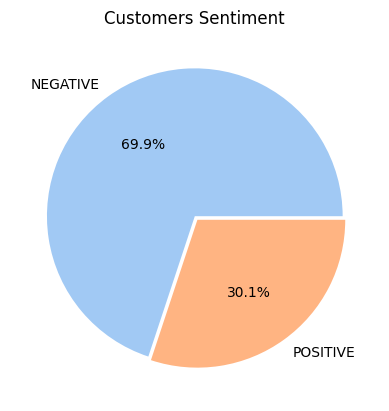

In [77]:
#declaring data
data = df_sent['count'].values
labels = df_sent['sentiment'].values

#declaring exploding pie
explode = [0, 0.03]

#decalring seaborn color palette
colors = sns.color_palette('pastel')


#plotting data on chart
plt.pie(data, labels=labels, colors=colors,
        explode=explode, autopct='%1.1f%%')

plt.title('Customers Sentiment')
plt.show()

In [63]:
#let's look at some reviews where the model label "POSITIVE" and Rating10 score differ the most
#POSITIVE Rating10 <=5 Reviews
df.query('Rating10 <= 5 and sentiment == "POSITIVE"')['Review'].values[:5]

array(['  Good flight apart from my seat fabric was coming apart on39J and lack of good leg room. Meal was good from Singapore. Should be more snacks on board. My neighbours passenger charger and headphone socket didn’t work.',
       '  Boarding and checkin formalities are very nice. Check in help desk was very helpful and supportive. Everything was nice except food. I am vegan and there was no food availability for vegetarian passengers if not pre-ordered. My flight was 10 hour journey from London to Bangalore, and I was hungry.',
       "  London to Athens. The aircraft and the flight quality were good, but they don't provide free food and drink. It was unacceptable they did not have sufficient supply for goods they were selling, so it ended quickly.",
       '  Barbados to Gatwick. We boarded a half full flight and whilst preparing for take off the video was shown as normal, the crew participation side of it seemed like trouble to the crew. Once inflight the drinks service got unde

In [67]:
#NEGATIVE Rating10 >7 Reviews
df.query('Rating10 > 7 and sentiment == "NEGATIVE"')['Review'].values[:5]

array(["  Flew back to UK from Miami in new Club World Suite - a huge improvement on the elderly Yin and Yang style Club World. Boarding easy. Took off 1/2 hour late due to delayed incoming aircraft but made up this time on way back and landed on time. Very comfortable suite with plenty of storage for bits and pieces. Bedding and large pillow supplied. Attentive FA's - especially Anna who addressed me by name). However, let down by very average catering (not very good short rib beef and underwhelming salmon for my wife). And, sadly, once again a very poor choice of films on the IFE which let down the excellent 17inch touch screen. Refused to pay BA's extortionate pre-pay to book your seat fees, and still got 2 seats together. C'mon BA - do we not pay enough already to travel Club Class ? I can recommend BA's new Club Class and we will travel this way - if we can afford it - in future.",
       '  Gatwick to Madrid. When I arrived I waited for one and a half hours for my one suitcase. I

- Most popular words in Review

In [78]:
#creating func for removing punctuations, stopwords and tokenzier and lemmatization text
import re
import nltk
from nltk import FreqDist
from nltk import wordpunct_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def clean_text(data):
    cleaned_text = []
    stopword = stopwords.words('english')

    for text in data:
        text = str(text).lower()
        text = re.sub(r'[^\w ]+', '', text)
        text = ' '.join([lemmatizer.lemmatize(word, pos='v') for word in word_tokenize(text) \
                  if not word in set(stopword) and len(word)>3])
        cleaned_text.append(text)
    return cleaned_text

cleaned_reviews_list = clean_text(df['Review'].tolist())

In [80]:
#create func to create words dataframe
from nltk import FreqDist

def words_frequency(text):
    words = ' '.join([sent for sent in text])
    words = words.split()
    freq_dist = FreqDist(words)
    words_df = pd.DataFrame({
        'word': freq_dist.keys(),
        'count': freq_dist.values()
    })
    return words_df

df_words = words_frequency(cleaned_reviews_list)

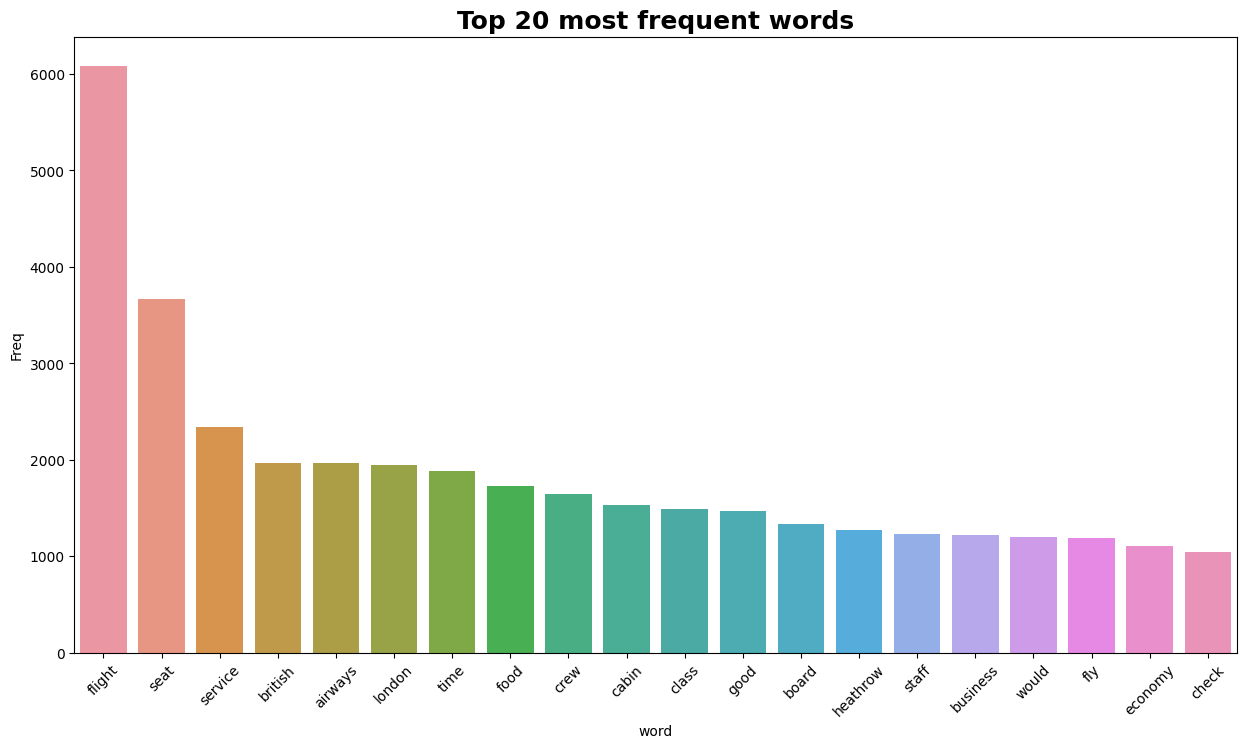

In [83]:
#visualize top 20 most frequent words
data = df_words.nlargest(columns='count', n=20)
plt.figure(figsize=(15,8))
sns.barplot(data=data, x='word', y='count')

plt.ylabel('Freq')
plt.xticks(rotation=45)
plt.title('Top 20 most frequent words', weight='bold', fontsize=18)
plt.show()

In [85]:
#df.to_csv('British_Airway_Sentiment.csv', index=False)